# About this notebook


In this notebook you can reproduce the plots about gradient descent.

# Imports

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

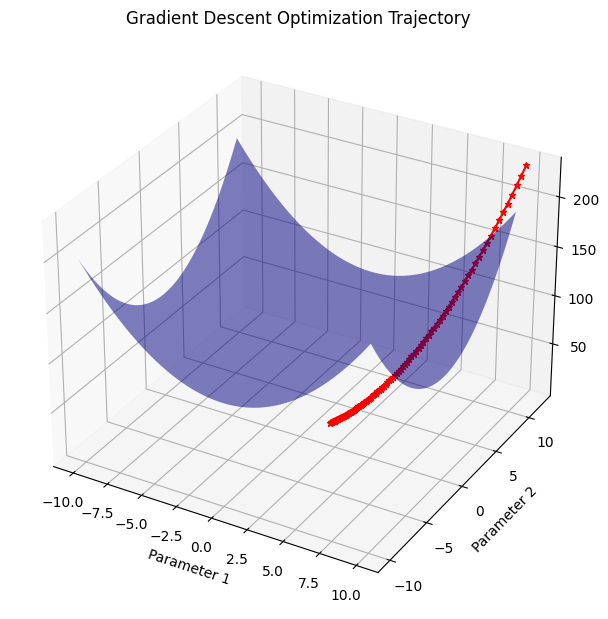

In [ ]:
# Define the function we want to optimize, let's use a simple quadratic function
def function_to_optimize(x, y):
    return x**2 + y**2

# Create a grid of values and compute the function for each point
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = function_to_optimize(x, y)

# Initialize parameters
params = torch.tensor([10.0, 12.0], requires_grad=True)

# We will use SGD without momentum to simplify
optimizer = torch.optim.SGD([params], lr=0.01)

# To record the path of the parameters
path = []

# Perform optimization
for _ in range(100):
    optimizer.zero_grad()

    # Compute the loss, which is the value of the function at the current parameters
    loss = function_to_optimize(params[0], params[1])

    # Backward pass to compute gradients
    loss.backward()

    # Update the parameters
    optimizer.step()

    # Record the current parameters
    path.append(params.data.numpy().copy())

# Convert the path to a numpy array for plotting
path = np.array(path)

# Plot the function as a surface
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111, projection='3d')
# Plot the path of the optimization
ax.plot(path[:,0], path[:,1], function_to_optimize(path[:,0], path[:,1]), color='r', marker='*', markersize=5)
ax.plot_surface(x, y, z, alpha=0.5, rstride=100, cstride=100, cmap='jet')

# Set labels
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
#ax.set_zlabel('Loss')

# Set title
ax.set_title('Gradient Descent Optimization Trajectory')

# Show the plot
plt.show()
